In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
# ms-python.python added
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


In [13]:
import matplotlib.pyplot as plt

def plot_loss(loss_values, val_loss_values):
    epochs = range(1, len(loss_values) + 1)

    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()


def plot_accuracy(acc, val_acc):
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()


In [14]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
max_len = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(
    num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=max_len)
input_test = sequence.pad_sequences(input_test, maxlen=max_len)
print('input_train shape :', input_train.shape)
print('input_test shape :', input_test.shape)


Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape : (25000, 500)
input_test shape : (25000, 500)


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 13s 665us/step - loss: 0.6452 - acc: 0.6117 - val_loss: 0.4777 - val_acc: 0.7916
Epoch 2/10
20000/20000 [==============================] - 13s 649us/step - loss: 0.4069 - acc: 0.8269 - val_loss: 0.3802 - val_acc: 0.8430
Epoch 3/10
20000/20000 [==============================] - 13s 661us/step - loss: 0.2862 - acc: 0.8877 - val_loss: 0.3621 - val_acc: 0.8448
Epoch 4/10
20000/20000 [==============================] - 13s 667us/step - loss: 0.2157 - acc: 0.9186 - val_loss: 0.3863 - val_acc: 0.8468
Epoch 5/10
20000/20000 [==============================] - 13s 670us/step - loss: 0.1594 - acc: 0.9410 - val_loss: 0.4861 - val_acc: 0.8428
Epoch 6/10
20000/20000 [==============================] - 14s 681us/step - loss: 0.1227 - acc: 0.9573 - val_loss: 0.4217 - val_acc: 0.8488
Epoch 7/10
20000/20000 [==============================] - 14s 677us/step - loss: 0.0815 - acc: 0.9734 - val_loss: 0.4

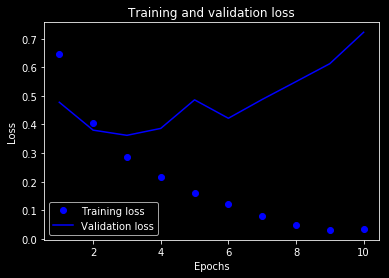

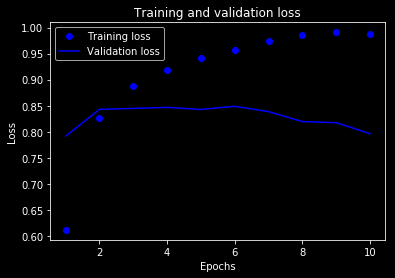

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

plot_loss(history.history['loss'], history.history['val_loss'])
plot_loss(history.history['acc'], history.history['val_acc'])


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 50s 2ms/step - loss: 0.5055 - acc: 0.7643 - val_loss: 0.3996 - val_acc: 0.8486
Epoch 2/10
20000/20000 [==============================] - 50s 3ms/step - loss: 0.2916 - acc: 0.8889 - val_loss: 0.2998 - val_acc: 0.8706
Epoch 3/10
20000/20000 [==============================] - 50s 2ms/step - loss: 0.2295 - acc: 0.9118 - val_loss: 0.2714 - val_acc: 0.8936
Epoch 4/10
20000/20000 [==============================] - 50s 3ms/step - loss: 0.1976 - acc: 0.9277 - val_loss: 0.3627 - val_acc: 0.8606
Epoch 5/10
20000/20000 [==============================] - 50s 2ms/step - loss: 0.1775 - acc: 0.9339 - val_loss: 0.2927 - val_acc: 0.8884
Epoch 6/10
20000/20000 [==============================] - 50s 2ms/step - loss: 0.1537 - acc: 0.9442 - val_loss: 0.4437 - val_acc: 0.8466
Epoch 7/10
20000/20000 [==============================] - 49s 2ms/step - loss: 0.1403 - acc: 0.9478 - val_loss: 0.5201 - val_acc:

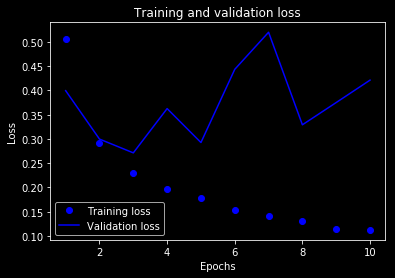

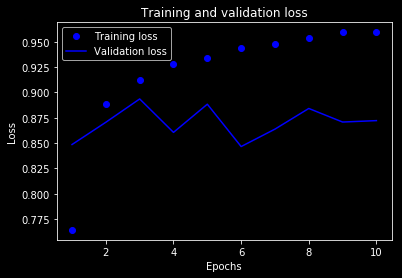

In [16]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

plot_loss(history.history['loss'], history.history['val_loss'])
plot_loss(history.history['acc'], history.history['val_acc'])